# Sonat fagdag - Data Assimilering

In [61]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [62]:
import numpy as np
#rng = np.random.default_rng(12345)
rng = np.random.default_rng()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams.update({'font.size': 18})

Creating the true state such that the initial guesses are really bad.

In [63]:
def true_state(dt, step):
    v = 30
    p = 100 + dt * step * v
    v = v
    return np.array([p, v])

In [64]:
# Initial state
p0 = 0 # [km]
v0 = 60 # [km / h]
x0 = np.array([p0, v0])
nparam = len(x0)

sigma_p = 2
sigma_v = 5

# Prediction matrix / forward propagator / forecast matrix
dt = 0.1
Mt = np.array([[1, dt], [0, 1]])

time_epochs = 15

In [65]:
def update(mu_prior, y, Sigma, Sigma_y):
    K = Sigma @ np.linalg.inv(Sigma + Sigma_y)
    mu_posterior = mu_prior + K @ (y - mu_prior)
    Sigma = Sigma - K @ Sigma
    return mu_posterior, Sigma

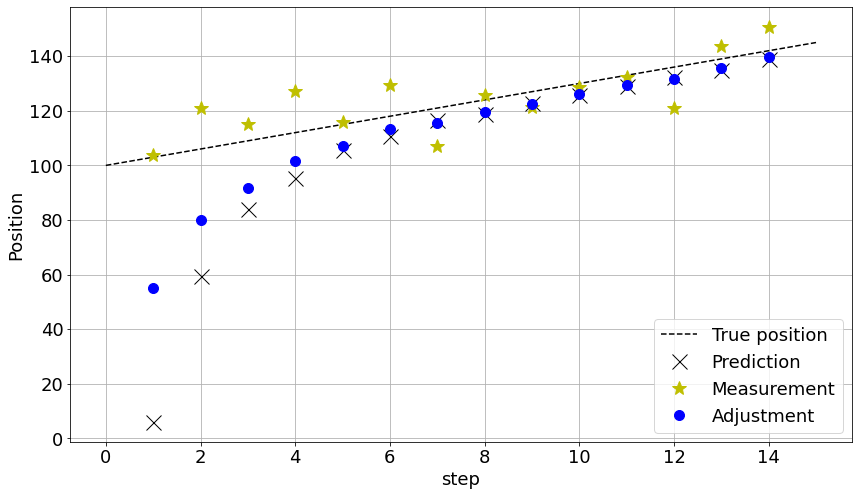

In [66]:
mu_prior = x0

measured_states = np.zeros(shape=(time_epochs - 1, nparam))

fig, ax = plt.subplots()
ax.plot(
    [0, time_epochs],
    [true_state(dt, 0)[0], true_state(dt, time_epochs)[0]],
    "k--",
    label="True position",
)

Sigma = np.array([[100, 0], [0, 100]])
for step in range(1, time_epochs):
    Sigma_y = np.array([[100, 0], [0, 100]])
    mu_prior = Mt @ mu_prior

    prediction_lbl = "Prediction" if step == 1 else None
    measurement_lbl = "Measurement" if step == 1 else None
    adjustment_lbl = "Adjustment" if step == 1 else None

    ax.plot(step, mu_prior[0], "kx", markersize=15, label=prediction_lbl)

    y = true_state(dt, step) + rng.multivariate_normal(
        mean=np.array([0, 0]), cov=Sigma_y
    )
    ax.plot(step, y[0], "y*", markersize=15, label=measurement_lbl)

    mu_posterior, Sigma = update(mu_prior, y, Sigma, Sigma_y)
    ax.plot(step, mu_posterior[0], "bo", markersize=10, label=adjustment_lbl)

    mu_prior = mu_posterior

ax.grid()
ax.set_xlabel("step")
ax.set_ylabel("Position")
ax.legend();